In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.special import inv_boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.utils import resample
from sklearn.metrics import root_mean_squared_error, median_absolute_error

In [2]:
# import the data and  drop no longer needed columns including redundant first category
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "description", "channel_title", "cat_Comedy"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
0,0,0,6,11,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,20,4,4,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,18,3,10,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,19,0,11,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,20,2,10,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# split into features and target variable
X = video_df.drop(columns="box_view_rate")
y = video_df["box_view_rate"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,0,11,0,11,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
309,0,19,1,9,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,12,3,5,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
364,0,17,4,4,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,16,3,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# load fitted lambda and back transform box cox test target values
with open("data/fitted_lambda.pkl", "rb") as f:
    fitted_lambda = pickle.load(f)

y_test_original = inv_boxcox(y_test, fitted_lambda)

In [22]:
# instantiate the scaler, fit it to training data and transform training and test features
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,-0.356200,-0.497947,-1.447714,1.425305,-0.803954,0.285886,-1.013423,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,2.047513,-0.196116,-0.291906,-0.038519,-0.094703
309,-0.356200,0.755625,-0.936623,0.844513,1.243853,0.285886,-1.013423,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,4.636809,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
535,2.807415,-0.341250,0.085561,-0.317069,-0.803954,0.285886,0.986754,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,4.636809,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
364,-0.356200,0.442232,0.596652,-0.607465,-0.803954,0.285886,0.986754,1.730342,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
346,-0.356200,0.285536,0.085561,-1.478651,1.243853,0.285886,0.986754,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,2.047513,-0.196116,-0.291906,-0.038519,-0.094703


In [23]:
# find the optimal alpha value using lasso for feature selection to fit linear regression using r2 and rmse metrics
alpha = [0.001, 0.01, 0.1, 0.2, 0.3]
box_rmse = []
original_rmse = []
medae = []

for a in alpha:
    lasso = Lasso(alpha=a, max_iter=6000)
    lasso.fit(X_train_scaled, y_train)
    X_train = X_train_scaled.iloc[:, lasso.coef_ > 0]
    X_test = X_test_scaled.iloc[:, lasso.coef_ > 0]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    y_pred_original = inv_boxcox(y_pred, fitted_lambda)
    box_rmse.append(round(root_mean_squared_error(y_test, y_pred), 2))
    original_rmse.append(round(root_mean_squared_error(y_test_original, y_pred_original), 2))
    medae.append(round(median_absolute_error(y_test_original, y_pred_original), 2))

alpha_scores = pd.DataFrame({"alpha": alpha, "box_rmse": box_rmse, "original_rmse": original_rmse, "medae": medae})
alpha_scores

,alpha,box_rmse,original_rmse,medae
0,0.001,1.91,512.48,16.56
1,0.010,1.88,484.06,18.52
2,0.100,2.09,549.22,17.95
3,0.200,2.28,572.39,17.88
4,0.300,2.40,580.25,17.89


In [24]:
# use optimal alpha value for lasso
lasso = Lasso(alpha=alpha_scores["alpha"][alpha_scores["original_rmse"] == alpha_scores["original_rmse"].min()].iloc[0], max_iter=6000)
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled.iloc[:, lasso.coef_ > 0]
X_test_lasso = X_test_scaled.iloc[:, lasso.coef_ > 0]
X_train_lasso.head()

,caption,month_published,tag_animals,tag_vegetarian,tag_debate,tag_count,term_20,term_42td,term_50,term_abamb,...,term_world,term_youtu,log_channel_view_count,log_channel_sub_count,log_duration_seconds,cat_Education,cat_Howto & Style,cat_Music,cat_People & Blogs,cat_Sports
50,-0.356200,1.425305,-0.326431,-0.342855,-0.384655,-0.938941,-0.266306,-0.233043,-0.185278,-0.233043,...,1.375163,-0.441402,-0.950910,-0.737212,0.834432,-0.285886,-0.179193,-0.109517,2.047513,-0.038519
309,-0.356200,0.844513,-0.326431,-0.342855,-0.384655,-0.938941,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,-0.441402,0.824070,0.989065,-0.970489,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
535,2.807415,-0.317069,-0.326431,-0.342855,-0.384655,-0.022183,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,0.100642,0.824070,0.989065,0.116304,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
364,-0.356200,-0.607465,-0.326431,-0.342855,-0.384655,1.200160,3.015527,-0.233043,2.429764,-0.233043,...,-0.250888,1.696707,0.385818,0.099039,0.731137,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
346,-0.356200,-1.478651,-0.326431,-0.342855,-0.384655,1.352953,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,-0.441402,-1.475162,-2.045863,-1.288972,-0.285886,-0.179193,-0.109517,2.047513,-0.038519


In [25]:
# fit the linear regression model to the feature extracted data
linreg = LinearRegression()
linreg.fit(X_train_lasso, y_train)
y_pred = linreg.predict(X_test_lasso)
y_pred_original = inv_boxcox(y_pred, fitted_lambda)
box_rmse = round(root_mean_squared_error(y_test, y_pred), 2)
original_rmse = round(root_mean_squared_error(y_test_original, y_pred_original), 2)
medae = round(median_absolute_error(y_test_original, y_pred_original), 2)
print(f"box_rmse: {(box_rmse)}, original_rmse: {original_rmse}, medae: {medae}")

box_rmse: 1.88, original_rmse: 484.06, medae: 18.52


In [26]:
# calculate 95% confidence intervals
rmse_scores = []
medae_scores = []
for i in range(1000):
    X_resampled, y_resampled = resample(X_test_lasso, y_test, n_samples=len(X_train), replace=True, random_state=i)
    y_resampled_pred = linreg.predict(X_resampled)
    y_resampled_original = inv_boxcox(y_resampled, fitted_lambda)
    y_resampled_pred_original = inv_boxcox(y_resampled_pred, fitted_lambda)
    rmse = root_mean_squared_error(y_resampled_original, y_resampled_pred_original)
    medae = median_absolute_error(y_resampled_original, y_resampled_pred_original)
    rmse_scores.append(rmse)
    medae_scores.append(medae)

rmse_lower = np.percentile(rmse_scores, 2.5)
rmse_upper = np.percentile(rmse_scores, 97.5)
medae_lower = np.percentile(medae_scores, 2.5)
medae_upper = np.percentile(medae_scores, 97.5)
print(f"RMSE CI: [{round(rmse_lower, 2)}, {round(rmse_upper, 2)}], MedAE CI: [{round(medae_lower, 2)}, {round(medae_upper, 2)}]")

RMSE CI: [362.92, 598.35], MedAE CI: [14.5, 23.97]


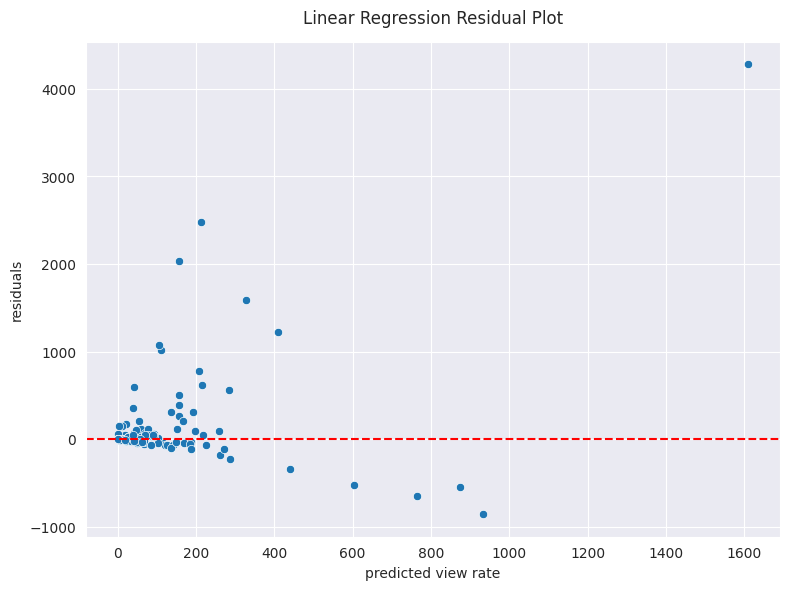

In [27]:
# visualize residuals to look for patterns
residuals = y_test_original - y_pred_original
sns.set_style("darkgrid")
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred_original, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted view rate")
plt.ylabel("residuals")
plt.title("Linear Regression Residual Plot", y=1.02)
plt.tight_layout()

# save png
plt.savefig("images/linreg_residual_plot")

In [28]:
# list the coefficients by highest absolute value for positive or negative impact on view count
coef_df = pd.Series(linreg.coef_, index=X_test_lasso.columns).sort_values(key=abs, ascending=False)
top_coef = coef_df.head(20)
top_coef

log_channel_view_count    0.979638
log_channel_sub_count     0.734646
term_vegangains           0.652126
term_truth                0.514153
cat_Education             0.486453
term_joeycarbstrong       0.474661
term_sub                  0.472499
log_duration_seconds     -0.464630
term_eat                  0.355459
term_omni                 0.354965
term_carnivore            0.306926
term_debate               0.305851
term_davidractivism      -0.305479
term_pubmed               0.301547
cat_Howto & Style         0.297717
term_protein              0.281452
term_socials              0.264586
term_supplements          0.259132
term_supporter            0.256585
term_join                -0.253986
dtype: float64

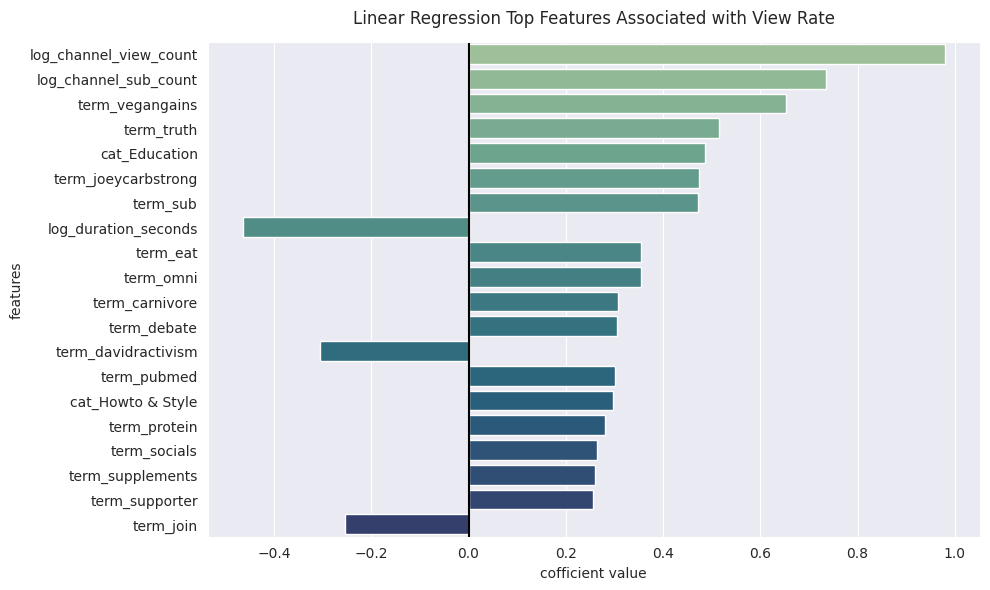

In [29]:
# visualize top feature coefficients
plt.subplots(figsize=(10, 6))
sns.barplot(x=top_coef.values, y=top_coef.index, palette="crest", hue=top_coef.index, legend=False, orient="h")
plt.axvline(0, color="black")
plt.title("Linear Regression Top Features Associated with View Rate", y=1.02)
plt.ylabel("features")
plt.xlabel("cofficient value")
plt.tight_layout()

# save png
plt.savefig("images/linreg_top_features.png", dpi=300)

In [33]:
# save model and lasso column names
with open("data/linreg.pkl", "wb") as f:
    pickle.dump(linreg, f)